In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import seaborn as sns
import textwrap
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [2]:
GOAnalysisDataframe = pd.read_csv("./GSEA_Module_2.csv")

In [3]:
GOAnalysisDataframe

,Unnamed: 0,GO,term,class,p,p_corr,n_genes,n_study,n_go,study_genes
0,0,GO:0002181,cytoplasmic translation,biological_process,2.022425e-10,2.527020e-06,9,92,89,"['RPS3', 'RPL5', 'RPL12', 'RPL13', 'RPS8', 'RP..."
1,1,GO:0006412,translation,biological_process,6.251572e-08,3.905670e-04,9,92,179,"['RPS3', 'RPL5', 'RPL12', 'RPL13', 'RPS8', 'RP..."
2,2,GO:0060710,chorio-allantoic fusion,biological_process,2.976111e-06,1.239550e-02,3,92,7,"['LEF1', 'WNT7B', 'ZFP36L1']"
3,3,GO:0022626,cytosolic ribosome,cellular_component,5.267787e-11,9.355590e-08,9,92,76,"['RPS3', 'RPL5', 'RPL12', 'RPL13', 'RPS8', 'RP..."
4,4,GO:0022625,cytosolic large ribosomal subunit,cellular_component,1.187291e-10,1.054314e-07,8,92,58,"['RPL5', 'RPL12', 'RPL13', 'RPL17', 'RPLP0', '..."
5,5,GO:0005925,focal adhesion,cellular_component,3.855339e-07,2.282360e-04,12,92,422,"['EGFR', 'VIM', 'TNC', 'RPS3', 'RPL5', 'HMGA1'..."
6,6,GO:1990904,ribonucleoprotein complex,cellular_component,9.950092e-06,4.417841e-03,7,92,168,"['ZFP36L1', 'VIM', 'RPS3', 'RPL5', 'RBMS1', 'R..."
7,7,GO:0003735,structural constituent of ribosome,molecular_function,2.507863e-09,1.145090e-05,10,92,177,"['RPS3', 'RPL5', 'RPL12', 'RPL13', 'RPS8', 'RP..."


In [4]:
GOAnalysisDataframe = GOAnalysisDataframe.sort_values(by=['n_genes'])
GOAnalysisDataframe = GOAnalysisDataframe.sort_values(by=['p_corr'])

In [5]:
GOAnalysisDataframe

,Unnamed: 0,GO,term,class,p,p_corr,n_genes,n_study,n_go,study_genes
3,3,GO:0022626,cytosolic ribosome,cellular_component,5.267787e-11,9.355590e-08,9,92,76,"['RPS3', 'RPL5', 'RPL12', 'RPL13', 'RPS8', 'RP..."
4,4,GO:0022625,cytosolic large ribosomal subunit,cellular_component,1.187291e-10,1.054314e-07,8,92,58,"['RPL5', 'RPL12', 'RPL13', 'RPL17', 'RPLP0', '..."
0,0,GO:0002181,cytoplasmic translation,biological_process,2.022425e-10,2.527020e-06,9,92,89,"['RPS3', 'RPL5', 'RPL12', 'RPL13', 'RPS8', 'RP..."
7,7,GO:0003735,structural constituent of ribosome,molecular_function,2.507863e-09,1.145090e-05,10,92,177,"['RPS3', 'RPL5', 'RPL12', 'RPL13', 'RPS8', 'RP..."
5,5,GO:0005925,focal adhesion,cellular_component,3.855339e-07,2.282360e-04,12,92,422,"['EGFR', 'VIM', 'TNC', 'RPS3', 'RPL5', 'HMGA1'..."
1,1,GO:0006412,translation,biological_process,6.251572e-08,3.905670e-04,9,92,179,"['RPS3', 'RPL5', 'RPL12', 'RPL13', 'RPS8', 'RP..."
6,6,GO:1990904,ribonucleoprotein complex,cellular_component,9.950092e-06,4.417841e-03,7,92,168,"['ZFP36L1', 'VIM', 'RPS3', 'RPL5', 'RBMS1', 'R..."
2,2,GO:0060710,chorio-allantoic fusion,biological_process,2.976111e-06,1.239550e-02,3,92,7,"['LEF1', 'WNT7B', 'ZFP36L1']"


In [6]:
plottingDF = GOAnalysisDataframe.head(5)

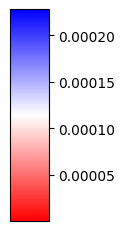

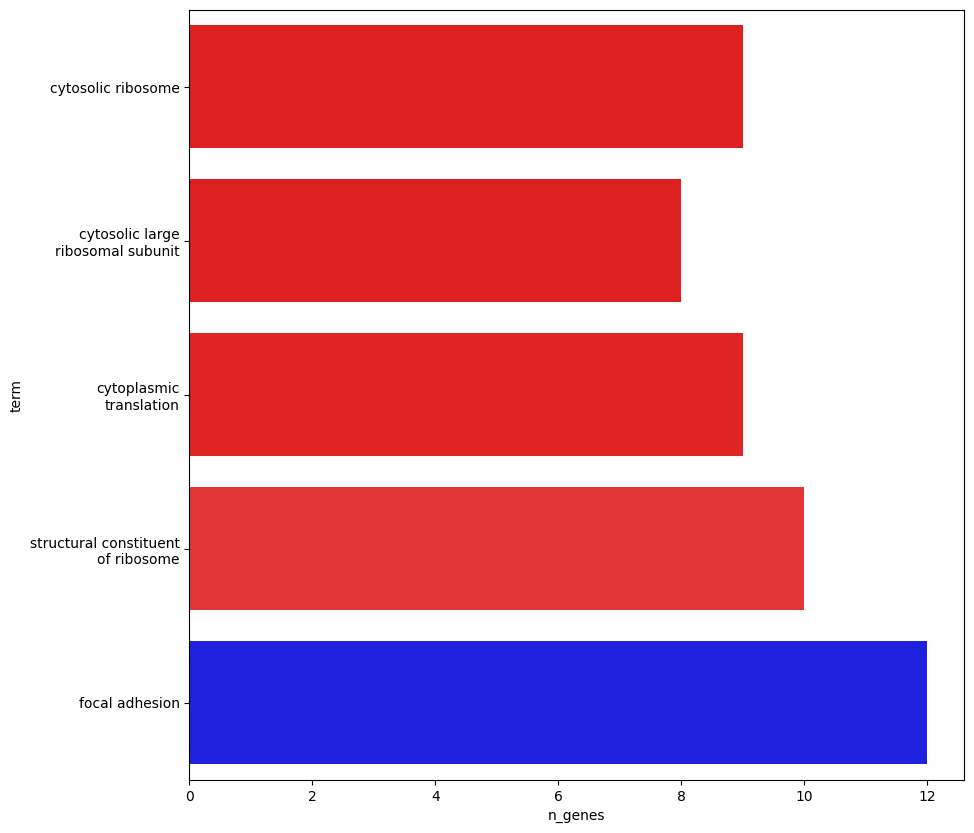

In [7]:
fig, ax = plt.subplots(figsize = (0.5, 2.75))
cmap = mpl.cm.bwr_r
norm = mpl.colors.Normalize(vmin = plottingDF.p_corr.min(), vmax = plottingDF.p_corr.max())
mapper = cm.ScalarMappable(norm = norm, cmap = cm.bwr_r)
cbl = mpl.colorbar.ColorbarBase(ax, cmap = cmap, norm = norm, orientation = 'vertical')
plt.savefig("./Module2Ticks.pdf", bbox_inches='tight')

plt.figure(figsize = (10,10))

ax = sns.barplot(data = plottingDF, x = 'n_genes', y = 'term', palette = mapper.to_rgba(plottingDF.p_corr.values))
ax.set_yticklabels([textwrap.fill(e, 22) for e in plottingDF['term']])

plt.savefig("./Module2.pdf", bbox_inches='tight')